In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading reviews from json file
with open('D:\Project\Sentiment Analysis for Marketing\Data\Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
reviews_df = pd.DataFrame(data)

In [4]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


# Data Dictionry
##### reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
##### asin - ID of the product, e.g. 0000013714
##### reviewerName - name of the reviewer
##### vote - helpful votes of the review
##### style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
##### reviewText - text of the review
##### overall - rating of the product
##### summary - summary of the review
##### unixReviewTime - time of the review (unix time)
##### reviewTime - time of the review (raw)
##### image - images that users post after they have received the product

In [6]:
reviews_df.shape

(497577, 12)

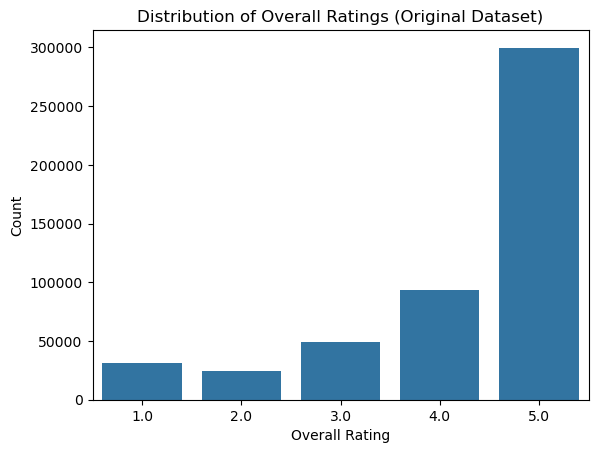

In [7]:
sns.countplot(data = reviews_df, x='overall')
plt.title('Distribution of Overall Ratings (Original Dataset)')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

In [8]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

In [9]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [10]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [11]:
undersampled_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
395787,1.0,False,"11 7, 2015",A3I155IWI3QFXI,B00VU4J13W,Metallicafan,Terrible game!! The guns sound ridiculous and ...,:(,1446854400,NaN,{'Format:': ' Video Game'},NaN
89022,1.0,False,"08 10, 2008",A3E975KR2HRERX,B000GH3PYK,T. Coleman,fun?! ZERO is what I should be allowed to give...,Challengingly bland...,1218326400,NaN,{'Platform:': ' Sony PSP'},NaN
111948,1.0,False,"04 18, 2013",AZITT56TNI5WD,B000SSQPU8,Kewlrane,If you like standard controls you will hate th...,I hate stylus games,1366243200,NaN,{'Format:': ' Video Game'},NaN
102653,1.0,True,"04 2, 2015",A2QFWLLKIMU81M,B000OYITQO,Linda Ann Dullinger,it didn't work when I got it.,One Star,1427932800,NaN,NaN,NaN
139312,1.0,True,"10 4, 2009",A2KUQ8L9Q3UW5O,B0017HIH6O,Kengineer,I found it hard to get the controls to do what...,Sluggish controls,1254614400,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60424,5.0,False,"07 15, 2009",A3V6Z4RCDGRC44,B0002XL3BA,Lisa Shea,God of War PS2 is a high energy fighting game ...,Hard Core Mature Combat Game,1247616000,NaN,{'Format:': ' Video Game'},NaN
167937,5.0,True,"06 21, 2012",A3QBWT7YMHL3NU,B001AWIP68,Jayrod215,You have to respect the classics. World at war...,World at war,1340236800,NaN,{'Format:': ' Video Game'},NaN
215647,5.0,True,"08 6, 2014",ANG2AWNVEZR57,B003R79HFW,Amazon Customer,Very well!!,Five Stars,1407283200,NaN,{'Format:': ' Software Download'},NaN
344677,5.0,True,"07 17, 2017",A261I3VTE3LPSK,B00IAVDOS6,Jordan P,Works perfectly with the default controller an...,Five Stars,1500249600,NaN,NaN,NaN


In [12]:
undersampled_reviews['overall'].value_counts(dropna=False)

overall
1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: count, dtype: int64

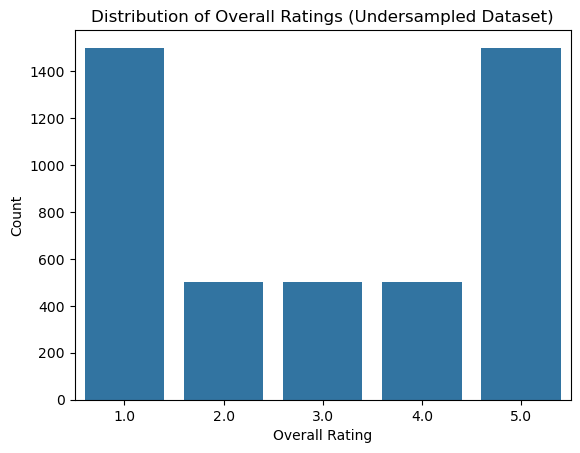

In [13]:
sns.countplot(data=undersampled_reviews, x='overall')
plt.title('Distribution of Overall Ratings (Undersampled Dataset)')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

In [14]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

In [15]:
undersampled_reviews.to_csv(r"D:\Project\Sentiment Analysis for Marketing\small_corpus.csv", index=False)

In [16]:
sample_100K_revs.to_csv(r"D:\Project\Sentiment Analysis for Marketing\big_corpus.csv", index=False)